In [1]:
%load_ext autoreload
%autoreload 2
import os
import torch as t
from config import opt
from model import FasterRCNNVGG16
from trainer import FasterRCNNTrainer
from data.util import  read_image
from util.vis_tool import vis_bbox
from util import array_tool as at
%matplotlib inline

In [2]:
img = read_image('assets/demo.jpg')
img = t.from_numpy(img)[None]

In [3]:
faster_rcnn = FasterRCNNVGG16()
trainer = FasterRCNNTrainer(faster_rcnn).cuda()

# 1. model converted from chainer

/usr/local/lib/python3.5/dist-packages/chainer/cuda.py:84: UserWarning: cuDNN is not enabled.
Please reinstall CuPy after you install cudnn
(see https://docs-cupy.chainer.org/en/stable/install.html#install-cupy-with-cudnn-and-nccl).
  'cuDNN is not enabled.\n'


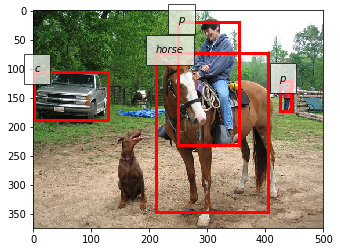

In [4]:
# in this machine the cupy isn't install correctly... 
# so it's a little slow
trainer.load('/home/cy/chainer_best_model_converted_to_pytorch_0.7053.pth')
opt.caffe_pretrain=True
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),at.tonumpy(_bboxes[0]),at.tonumpy(_labels[0]).reshape(-1))

# 2. model trained with torchvision pretrained model

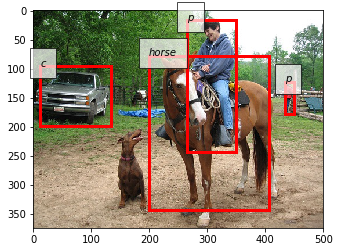

In [5]:
trainer.load('/home/cy/fasterrcnn_12211511_0.701052458187_torchvision_pretrain.pth')
opt.caffe_pretrain=False
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),at.tonumpy(_bboxes[0]),at.tonumpy(_labels[0]).reshape(-1))

# 3. model trained with caffe pretrained model

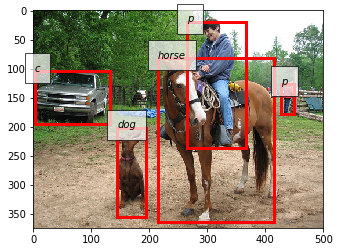

In [6]:
# in this machine the cupy isn't install correctly... 
# so it's ali
trainer.load('/home/cy/fasterrcnn_12222105_0.712649824453_caffe_pretrain.pth')
opt.caffe_pretrain=True
_bboxes, _labels, _scores = trainer.faster_rcnn.predict(img,visualize=True)
vis_bbox(at.tonumpy(img[0]),at.tonumpy(_bboxes[0]),at.tonumpy(_labels[0]).reshape(-1))